# Metrics of Clustering

## Loading Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

import scanpy as sc
import numpy as np
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, normalized_mutual_info_score

import matplotlib.pyplot as plt

## Loading Results

In [2]:
adata_results_all = {}

Spatial_Patterns = ['Spatial_Scenario_1', 'Spatial_Scenario_2', 'Spatial_Scenario_3', 'Spatial_Scenario_4']

for pattern in Spatial_Patterns:
    adata = sc.read_h5ad(f'../../{pattern}.h5ad')
    adata_results_all[pattern] = adata

In [3]:
adata_results_all

{'Spatial_Scenario_1': AnnData object with n_obs × n_vars = 1200 × 3031
     obs: 'Ground Truth', 'batch', 'SpaGCN', 'SpatialGlue', 'STAGATE', 'MultiMAP', 'MultiVI', 'Modality1', 'Modality2', 'SpaKnit'
     obsm: 'Modality1', 'Modality2', 'MultiMAP', 'MultiVI', 'STAGATE', 'SpaKnit', 'SpatialGlue', 'spatial',
 'Spatial_Scenario_2': AnnData object with n_obs × n_vars = 1200 × 3031
     obs: 'Ground Truth', 'batch', 'SpaGCN', 'SpatialGlue', 'STAGATE', 'MultiMAP', 'MultiVI', 'Modality1', 'Modality2', 'SpaKnit'
     obsm: 'Modality1', 'Modality2', 'MultiMAP', 'MultiVI', 'STAGATE', 'SpaKnit', 'SpatialGlue', 'spatial',
 'Spatial_Scenario_3': AnnData object with n_obs × n_vars = 1200 × 3031
     obs: 'Ground Truth', 'batch', 'SpaGCN', 'SpatialGlue', 'STAGATE', 'MultiMAP', 'MultiVI', 'Modality1', 'Modality2', 'SpaKnit'
     obsm: 'Modality1', 'Modality2', 'MultiMAP', 'MultiVI', 'STAGATE', 'SpaKnit', 'SpatialGlue', 'spatial',
 'Spatial_Scenario_4': AnnData object with n_obs × n_vars = 1200 × 303

## Calculating Metrics

In [4]:
# Define methods and metrics
methods = ['SpaKnit', 'SpatialGlue', 'MultiVI', 'MultiMAP', 'STAGATE', 'SpaGCN', 'Modality1', 'Modality2']
metrics = ['ARI', 'AMI', 'NMI']

# Initialize an empty dictionary to store metrics for all patterns
metrics_dict = {}

# Function to calculate metrics for a given batch
def calculate_metrics(batch_data, methods):
    true_labels = batch_data.obs['Ground Truth'].values
    batch_metrics = {method: {'ARI': [], 'AMI': [], 'NMI': []} for method in methods}
    for method in methods:
        pred_labels = batch_data.obs[method].values
        ari = adjusted_rand_score(true_labels, pred_labels)
        ami = adjusted_mutual_info_score(true_labels, pred_labels)
        nmi = normalized_mutual_info_score(true_labels, pred_labels)
        batch_metrics[method] = {'ARI': ari, 'AMI': ami, 'NMI': nmi}
    return batch_metrics

# Iterate over each spatial pattern
for pattern in Spatial_Patterns:
    adata = adata_results_all[pattern]
    # Get unique batches
    batches = adata.obs['batch'].unique()
    # Initialize a dictionary to store metrics for each method
    pattern_metrics = {method: {'ARI': [], 'AMI': [], 'NMI': []} for method in methods}
    # Iterate over each batch
    for batch in batches:
        # Get data for this batch
        batch_data = adata[adata.obs['batch'] == batch]
        # Calculate metrics for this batch
        batch_metrics = calculate_metrics(batch_data, methods)
        # Append metrics to pattern_metrics
        for method in methods:
            for metric in metrics:
                pattern_metrics[method][metric].append(batch_metrics[method][metric])
    # Save metrics for this pattern
    metrics_dict[pattern] = pattern_metrics

Drawing plot for Spatial_Scenario_1 - ARI


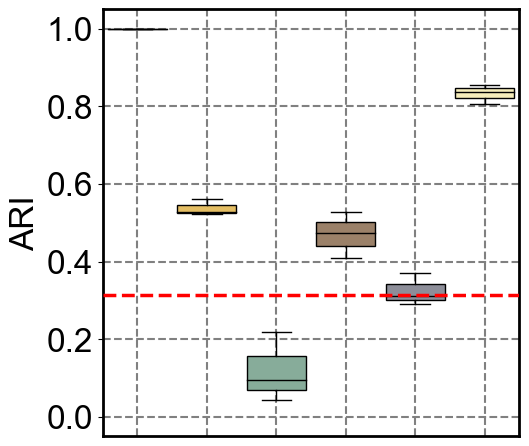

Drawing plot for Spatial_Scenario_1 - AMI


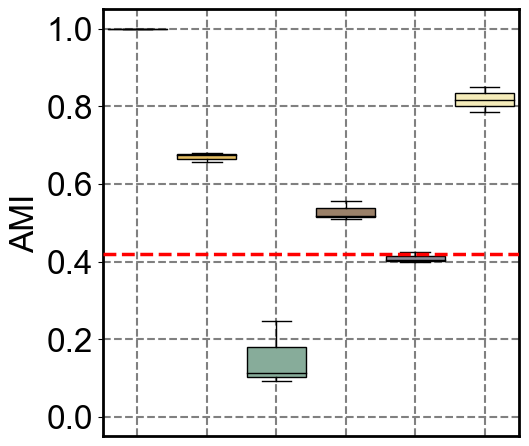

Drawing plot for Spatial_Scenario_1 - NMI


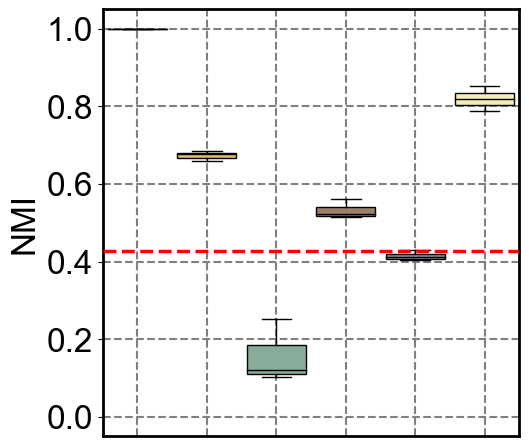

Drawing plot for Spatial_Scenario_2 - ARI


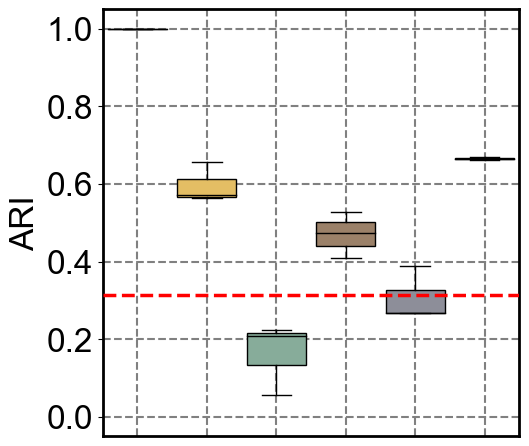

Drawing plot for Spatial_Scenario_2 - AMI


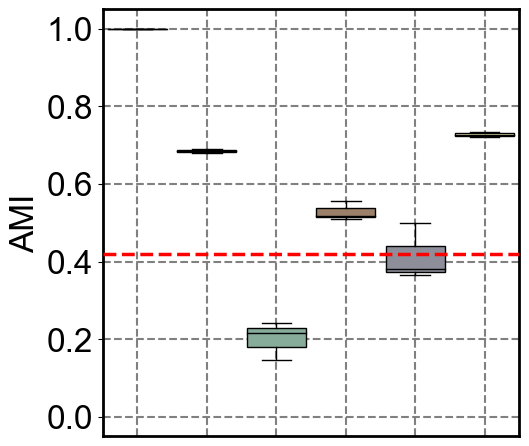

Drawing plot for Spatial_Scenario_2 - NMI


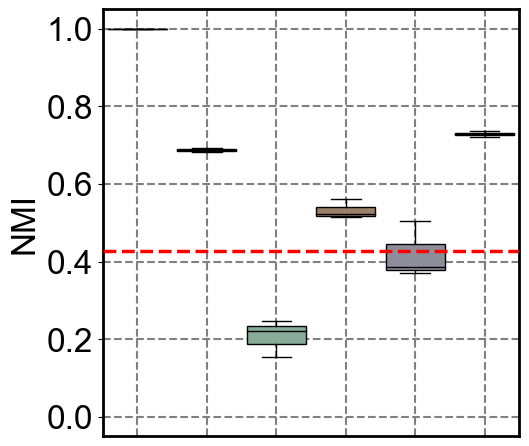

Drawing plot for Spatial_Scenario_3 - ARI


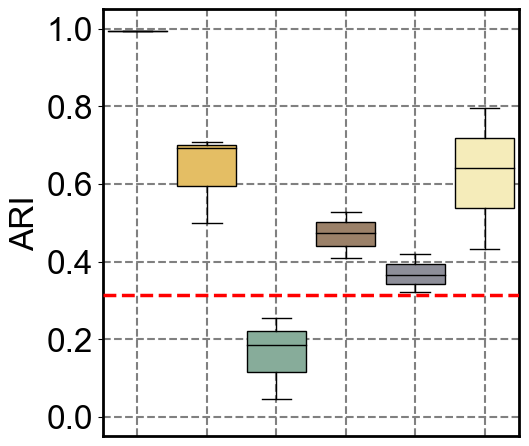

Drawing plot for Spatial_Scenario_3 - AMI


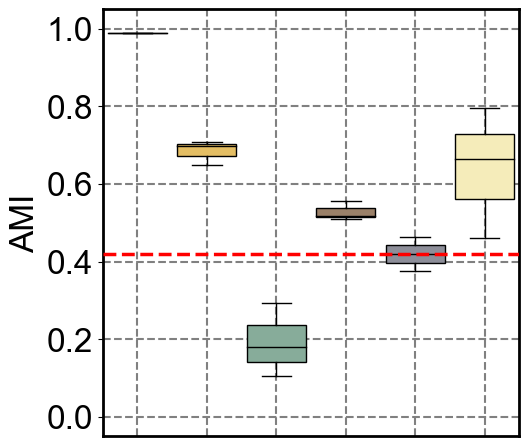

Drawing plot for Spatial_Scenario_3 - NMI


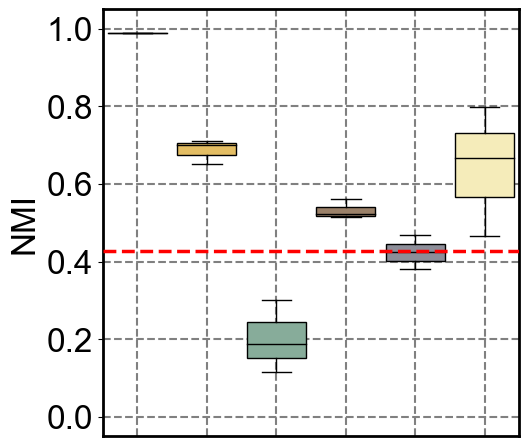

Drawing plot for Spatial_Scenario_4 - ARI


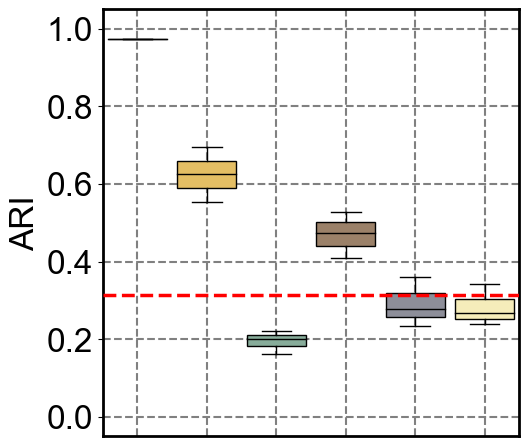

Drawing plot for Spatial_Scenario_4 - AMI


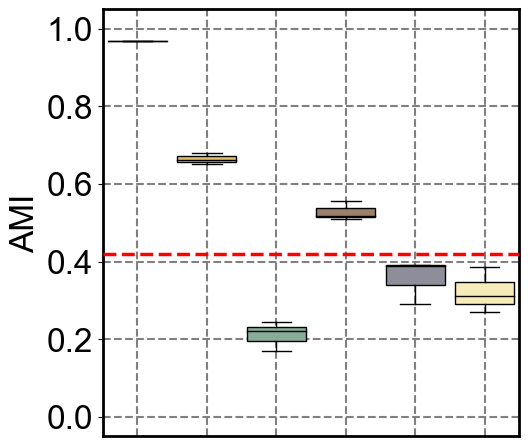

Drawing plot for Spatial_Scenario_4 - NMI


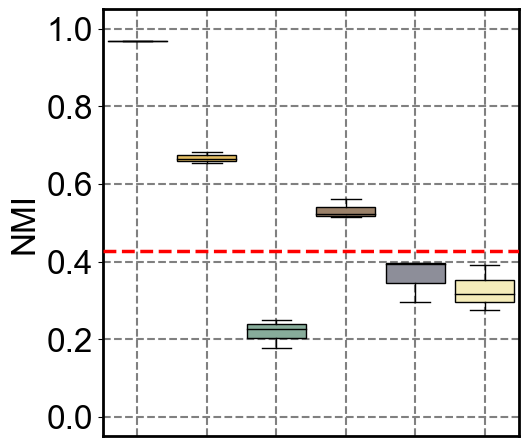

In [ ]:
# Define the metrics
metrics = ['ARI', 'AMI', 'NMI']
# Define methods and corresponding colors
methods = ['SpaKnit', 'SpatialGlue', 'MultiVI', 'MultiMAP', 'STAGATE', 'SpaGCN']
colors = ['#D0836F', '#E4BE64', '#87AC9A', '#9B8169', '#8D8E99', '#F5ECBA']

# Set the y-axis range (adjust according to actual data)
y_min = -0.05
y_max = 1.05

# Set global font size and font
fontsize = 24
plt.rcParams['font.sans-serif'] = ['Arial'] 
plt.rcParams['font.size'] = fontsize

# Iterate over each pattern
for i, pattern in enumerate(Spatial_Patterns):
    # Get the metrics results for this pattern
    pattern_metrics = metrics_dict[pattern]
    # Iterate over each metric
    for j, metric in enumerate(metrics):
        # Create a new figure
        plt.figure(figsize=(6, 5))
        
        # Calculate the medians of Modality1 and Modality2
        modality1_median = np.median(pattern_metrics['Modality1'][metric])
        modality2_median = np.median(pattern_metrics['Modality2'][metric])
        
        # Calculate the maximum of the two modality medians
        max_median = max(modality1_median, modality2_median)
        
        # Prepare the data for other methods
        data = [pattern_metrics[method][metric] for method in methods]
        
        # Plot the boxplot
        bp = plt.boxplot(data, patch_artist=True, 
                         boxprops=dict(linestyle='-', linewidth=1, edgecolor='black'),  # Box edges
                         medianprops=dict(linestyle='-', linewidth=1, color='black'),  # Median line
                         whiskerprops=dict(linestyle='-', linewidth=1, color='black'),  # Whiskers
                         capprops=dict(linestyle='-', linewidth=1, color='black'),  # Caps
                         widths=0.85,  # Box width
                         showfliers=False)  # Do not show outliers
        
        # Color the boxes
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
        
        # Plot a line representing the maximum of the two modality medians
        # Ensure this line is on top by setting a high zorder value
        plt.axhline(y=max_median, color='#FF0000', linestyle='--', linewidth=2.5, zorder=10)  # Thicker red line on top
        
        # Remove x-axis tick labels
        plt.xticks([])  # Remove x-axis tick labels
        
        # Set the unified y-axis range
        plt.ylim(y_min, y_max)
        
        # Add y-axis label
        plt.ylabel(metric, fontsize=fontsize)
        
        # Thicken the figure's border
        for spine in plt.gca().spines.values():
            spine.set_linewidth(2)
        
        # Add grid lines
        plt.grid(axis='y', color='gray', linestyle='--', alpha=1, zorder=-10, linewidth=1.5)
        
        # Add vertical dashed lines
        for x in range(1, len(methods) + 1):
            plt.axvline(x=x, color='gray', linestyle='--', alpha=1, zorder=-10, linewidth=1.5)
        
        # Print plotting information
        print(f"Drawing plot for {pattern} - {metric}")
        
        # Display the figure
        plt.tight_layout()

        plt.savefig(f"./Scenario{i+1}/Metrics_{metric}.png", dpi=500)
        plt.savefig(f"./Scenario{i+1}/Metrics_{metric}.eps", dpi=500)

        plt.show()